In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy.typing as npt
from typing import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdf = gpd.read_file('data/MAIN_FILE.geojson')
gdf = gdf.to_crs({'init': 'EPSG:29902'})
gdf['area_sq_km'] = gdf['geometry'].area / 1_000_000
gdf.info()

/home/alvaro/.local/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3409 entries, 0 to 3408
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GUID_            3409 non-null   object  
 1   2022_Population  3409 non-null   float64 
 2   2016_Population  3409 non-null   int32   
 3   2011_Population  3409 non-null   int32   
 4   2006_Population  3371 non-null   float64 
 5   2002_Population  3367 non-null   float64 
 6   1996_Population  3364 non-null   float64 
 7   geometry         3409 non-null   geometry
 8   area_sq_km       3409 non-null   float64 
dtypes: float64(5), geometry(1), int32(2), object(1)
memory usage: 213.2+ KB


In [4]:
gdf['2022_Density'] = gdf['2022_Population'] / gdf['area_sq_km']
gdf["2016_Density"] = gdf["2016_Population"] / gdf["area_sq_km"]
gdf["2011_Density"] = gdf["2011_Population"] / gdf["area_sq_km"]
gdf["2006_Density"] = gdf["2006_Population"] / gdf["area_sq_km"]
gdf["2002_Density"] = gdf["2002_Population"] / gdf["area_sq_km"]
gdf["1996_Density"] = gdf["1996_Population"] / gdf["area_sq_km"]

In [7]:
gdf.head()

,GUID_,2022_Population,2016_Population,2011_Population,2006_Population,2002_Population,1996_Population,geometry,area_sq_km,2022_Density,2016_Density,2011_Density,2006_Density,2002_Density,1996_Density
0,2AE196291F5013A3E055000000000001,4666.0,4489,4469,4250.0,3955.0,3468.0,"POLYGON ((150710.077 55091.839, 150712.679 550...",28.393831,164.331471,158.097722,157.393344,149.680401,139.290820,122.139207
1,2AE19629240313A3E055000000000001,214.0,200,194,180.0,177.0,169.0,"POLYGON ((255590.372 127597.171, 255593.669 12...",13.251078,16.149629,15.093111,14.640318,13.583800,13.357404,12.753679
2,2AE1962917E613A3E055000000000001,2915.0,2339,1799,2138.0,1879.0,667.0,"POLYGON ((157382.587 156699.439, 157352.617 15...",0.180971,16107.590679,12924.752864,9940.842412,11814.075085,10382.903220,3685.681984
3,2AE1962921D313A3E055000000000001,202.0,217,205,202.0,211.0,175.0,"POLYGON ((140697.774 46821.314, 140694.413 468...",11.741822,17.203463,18.480947,17.458960,17.203463,17.969953,14.903990
4,2AE196291C1F13A3E055000000000001,433.0,429,433,374.0,382.0,366.0,"POLYGON ((236635.642 135029.179, 236632.747 13...",18.859730,22.958972,22.746879,22.958972,19.830613,20.254797,19.406429


In [21]:
df_2022= pd.read_csv('data/birth_rates/2022_population_pyramid.csv')
df_2016 = pd.read_csv('data/birth_rates/2016_population_pyramid.csv')
df_2011 = pd.read_csv('data/birth_rates/2011_population_pyramid.csv')

df_2022 = df_2022.drop(columns = ["Statistic Label", "Census Year", "UNIT"])
df_2016 = df_2016.drop(columns = ["STATISTIC Label", "Census Year", "UNIT"])
df_2011 = df_2011.drop(columns = ["Statistic Label", "Census Year", "UNIT"])

In [22]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194997 entries, 0 to 194996
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   CSO Electoral Divisions 2022  194997 non-null  object
 1   Age                           194997 non-null  object
 2   Sex                           194997 non-null  object
 3   VALUE                         194997 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [44]:
deaths = pd.read_excel("data/death_rates/ILT2015-2017_TBL1.xlsx")
deaths.head()

,Exact age of person,Number of persons surviving,Number of deaths,Probability of surviving a year,Rate of mortality,Population expected,Expected number of person years lived,Life expectancy at age x
0,0,100000.000000,332.355415,0.996676,0.003324,99833.822293,7.964620e+06,79.646204
1,1,99667.644585,18.188099,0.999818,0.000182,99658.550536,7.864787e+06,78.910128
2,2,99649.456486,15.759438,0.999842,0.000158,99641.576767,7.765128e+06,77.924440
3,3,99633.697048,10.472353,0.999895,0.000105,99628.460871,7.665486e+06,76.936686
4,4,99623.224695,8.843256,0.999911,0.000089,99618.803067,7.565858e+06,75.944721


In [63]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Exact age of person                    106 non-null    int64  
 1   Number of persons surviving            106 non-null    float64
 2   Number of deaths                       106 non-null    float64
 3   Probability of surviving a year        106 non-null    float64
 4   Rate of mortality                      106 non-null    float64
 5   Population expected                    106 non-null    float64
 6   Expected number of person years lived  106 non-null    float64
 7   Life expectancy at age x               106 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 6.8 KB


In [45]:
df_2022["Age"].value_counts()
age_groups = ["Age 0-4", "Age 5-9", "Age 10-14", "Age 15-19", "Age 20-24", "Age 25-29", "Age 30-34", "Age 35-39", "Age 40-44", "Age 45-49", "Age 50-54", "Age 55-59", "Age 60-64", "Age 65-69", "Age 70-74", "Age 75-79", "Age 80-84", "Age 85 and over"]

In [72]:
death_rates = []
mortality_rates = deaths["Rate of mortality"].values
population_expected = deaths["Population expected"].values
weighted_rates = mortality_rates * population_expected

for i in range(len(age_groups) - 1):
    death_rates.append(weighted_rates[5 * i: 5 * i + 4].sum() / population_expected[5 * i: 5 * i + 4].sum())

old_people = (weighted_rates[85:].sum() / population_expected[85:].sum())
death_rates.append(old_people)

len(death_rates), len(age_groups)
death_rates, age_groups

([0.000943467936128843,
  6.222481273666476e-05,
  7.507715926136053e-05,
  0.0002928140462640723,
  0.0005183064284069917,
  0.0005989201358649305,
  0.0007342583447262534,
  0.0009579439271057389,
  0.0013231065496210673,
  0.0019246659303150128,
  0.0029332168619534593,
  0.004658493256279822,
  0.007667792643965242,
  0.01300442844128999,
  0.022579792037825924,
  0.03983691362087797,
  0.0707375922592169,
  0.16313961004757227],
 ['Age 0-4',
  'Age 5-9',
  'Age 10-14',
  'Age 15-19',
  'Age 20-24',
  'Age 25-29',
  'Age 30-34',
  'Age 35-39',
  'Age 40-44',
  'Age 45-49',
  'Age 50-54',
  'Age 55-59',
  'Age 60-64',
  'Age 65-69',
  'Age 70-74',
  'Age 75-79',
  'Age 80-84',
  'Age 85 and over'])

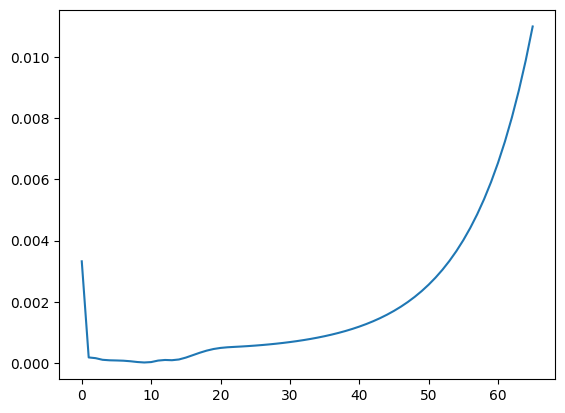

In [65]:
import matplotlib.pyplot as plt
plt.plot(deaths["Exact age of person"][:-40], deaths["Rate of mortality"][:-40])